In [1]:
import xarray as xr
import hvplot.xarray
import numpy as np
import matplotlib.pyplot as plt
url9 = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/oceanography/waterlevel/eopNoaaTide/2021/FRF-ocean_waterlevel_eopNoaaTide_202109.nc'
ds9 = xr.open_dataset(url9)
url10 = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/oceanography/waterlevel/eopNoaaTide/2021/FRF-ocean_waterlevel_eopNoaaTide_202110.nc'
ds10 = xr.open_dataset(url10)
ds = xr.concat([ds9,ds10],dim='time')

In [2]:
print(ds10.time.values[:-1])
print(ds10.waterLevel.values[:-1])

['2021-10-01T00:00:00.000000000' '2021-10-01T00:05:59.999998464'
 '2021-10-01T00:11:59.999997440' ... '2021-10-31T23:35:59.999995136'
 '2021-10-31T23:42:00.000004096' '2021-10-31T23:48:00.000002560']
[-0.11  -0.134 -0.139 ...    nan    nan    nan]


In [3]:
ds.waterLevel.hvplot(x='time', grid=True)

:Curve   [time]   (waterLevel)

In [4]:
ds.residualWaterLevel.hvplot(x='time',grid=True)

:Curve   [time]   (residualWaterLevel)

In [5]:
from scipy.ndimage.filters import maximum_filter1d

def max_filter1d_valid(a, W):
    hW = (W-1)//2 # Half window size
    return maximum_filter1d(a, size=W, mode='constant', cval=np.nan)[hW:-hW]

(14640,) (14640,) (14640,)


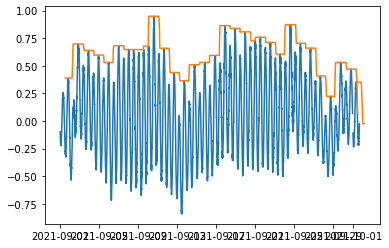

In [6]:
t = ds.time.values
WL = ds.waterLevel.values
mxWL = maximum_filter1d(WL,size=251, mode='constant', cval=np.nan)
print(np.shape(t),np.shape(WL),np.shape(mxWL))
plt.plot(t,WL,t,mxWL)